In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_data = nib.load('../../images/1/FLAIR.nii.gz').get_fdata()

In [4]:
filtered_image_data = np.zeros_like(image_data)
for x in range(1, image_data.shape[0]-2) :
  for y in range(1, image_data.shape[1]-2) :
    for z in range(1, image_data.shape[2]-2) :
      voxel_of_interest = image_data[x, y, z]

      avg = 0
      for dx in range(-1, 1) :
        for dy in range(-1, 1) :
          for dz in range(-1, 1) :
            avg = avg + image_data[x+dx, y+dy, z+dz]

      filtered_image_data[x+1, y+1, z+1] = avg / 27

In [5]:
image_data = filtered_image_data

In [6]:
dfdx = np.zeros_like(image_data)
dfdy = np.zeros_like(image_data)
dfdz = np.zeros_like(image_data)
for x in range(1, image_data.shape[0]-2) :
  for y in range(1, image_data.shape[1]-2) :
    for z in range(1, image_data.shape[2]-2) :
      dfdx[x, y, z] = image_data[x+1, y, z]-image_data[x-1, y, z]
      dfdy[x, y, z] = image_data[x, y+1, z]-image_data[x, y-1, z]
      dfdz[x, y, z] = image_data[x, y, z+1]-image_data[x, y, z-1]

In [7]:
magnitude = np.sqrt(np.power(dfdx, 2) + np.power(dfdy, 2) + np.power(dfdz, 2))

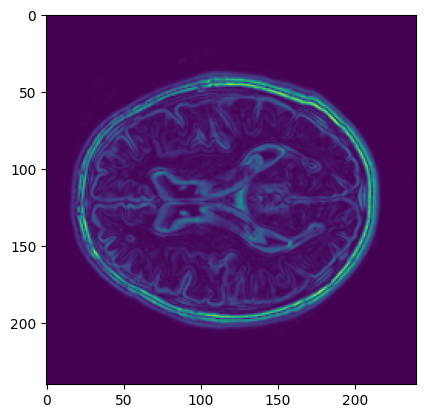

In [8]:
plt.imshow(magnitude[:, :, 24])

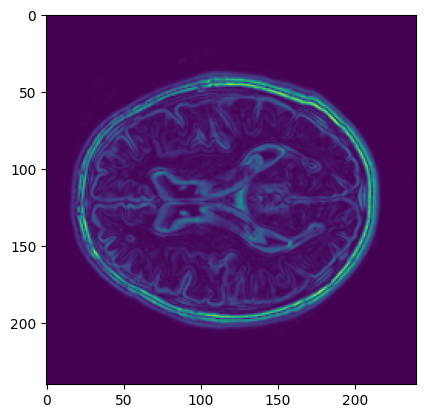

In [9]:
plt.imshow(magnitude[:, :, 24])

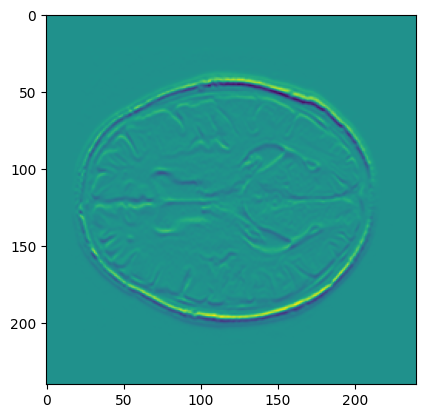

In [10]:
plt.imshow(dfdx[:, :, 24])

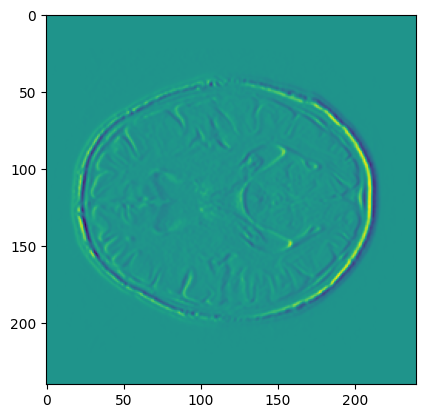

In [11]:
plt.imshow(dfdy[:, :, 24])

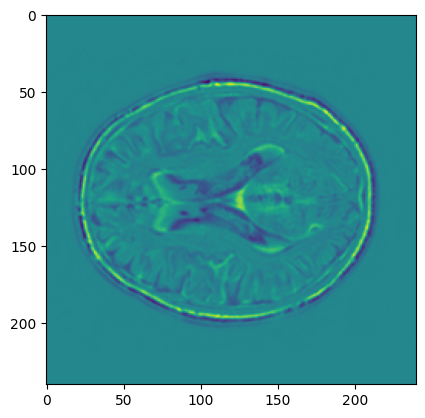

In [12]:
plt.imshow(dfdz[:, :, 24])